In [1]:
##import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
##import DATA 
df=pd.read_csv(r"C:\Users\AQSAA\Downloads\used_cars.csv",sep=",")

In [3]:
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [4]:
## Exploratory Data Analysis
df.shape

(4009, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 203.6+ KB


In [6]:
df.drop(columns=["ext_col","int_col"],axis=1,inplace=True)

In [7]:
df.price = df.price.str.replace('[\$,]', '', regex=True).astype(float)
df.milage = df.milage.str.replace('[,ml.i]', '', regex=True).astype(float)

In [8]:
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,NaN,34999.0
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,2.4 Liter,F,None reported,NaN,14798.0
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,31000.0
7,BMW,740 iL,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,None reported,Yes,7300.0
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,41927.0
9,Tesla,Model X Long Range Plus,2020,34000.0,NaN,534.0HP Electric Motor Electric Fuel System,A/T,None reported,Yes,69950.0


In [9]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
accident        113
clean_title     596
price             0
dtype: int64

<AxesSubplot:>

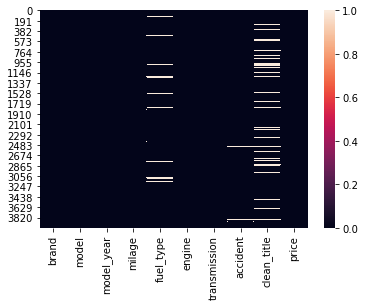

In [10]:
sns.heatmap(df.isnull())

In [11]:
null_percentage=df.isnull().sum()/len(df)*100

In [12]:
null_percentage

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64

In [13]:
fuel_type_mode=df['fuel_type'].mode()[0]
df['fuel_type']=df['fuel_type'].replace(np.nan,fuel_type_mode)
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
accident        113
clean_title     596
price             0
dtype: int64

In [14]:
clean_title_mode=df['clean_title'].mode()[0]
df['clean_title']=df['clean_title'].replace(np.nan,clean_title_mode)
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
accident        113
clean_title       0
price             0
dtype: int64

In [15]:
df.dropna(subset=['accident'],how='any',inplace=True)

In [16]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
accident        0
clean_title     0
price           0
dtype: int64

<AxesSubplot:>

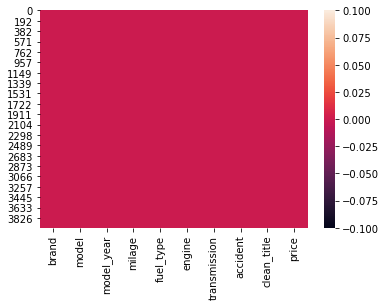

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3896 entries, 0 to 4008
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3896 non-null   object 
 1   model         3896 non-null   object 
 2   model_year    3896 non-null   int64  
 3   milage        3896 non-null   float64
 4   fuel_type     3896 non-null   object 
 5   engine        3896 non-null   object 
 6   transmission  3896 non-null   object 
 7   accident      3896 non-null   object 
 8   clean_title   3896 non-null   object 
 9   price         3896 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 228.3+ KB


In [19]:
## DATA Analysis
df.corr()

,model_year,milage,price
model_year,1.000000,-0.625200,0.196643
milage,-0.625200,1.000000,-0.302596
price,0.196643,-0.302596,1.000000


<AxesSubplot:>

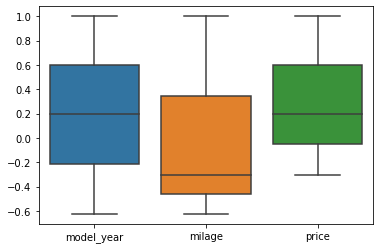

In [20]:
sns.boxplot(data=df.corr())

<AxesSubplot:>

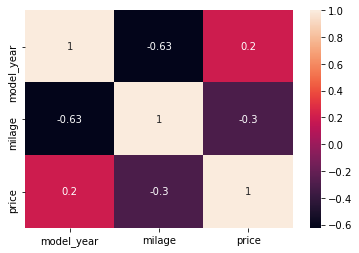

In [21]:
sns.heatmap(df.corr(),annot=True)

(0.0, 3105868.856573217)

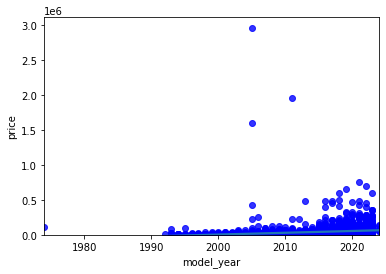

In [22]:
sns.regplot(x='model_year',y='price',data=df,scatter_kws={"color": "blue"})
plt.ylim(0,)

Text(0, 0.5, 'Price')

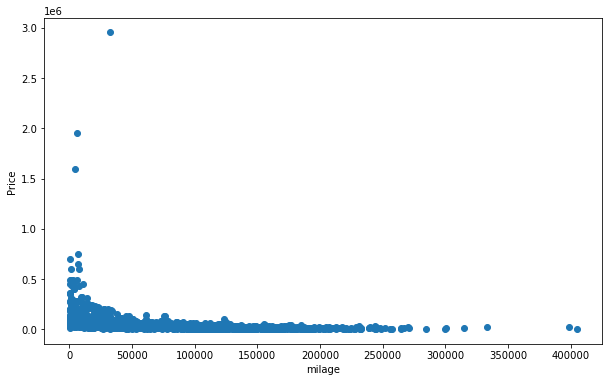

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x='milage',y='price',data=df)
plt.xlabel("milage")
plt.ylabel("Price")

In [24]:
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,None reported,Yes,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,Yes,34999.0
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,2.4 Liter,F,None reported,Yes,14798.0
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,31000.0
7,BMW,740 iL,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,None reported,Yes,7300.0
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,41927.0
9,Tesla,Model X Long Range Plus,2020,34000.0,Gasoline,534.0HP Electric Motor Electric Fuel System,A/T,None reported,Yes,69950.0


In [25]:
top_sales_by_brand=df.brand.value_counts().reset_index().head(10)
top_sales_by_brand.columns=['brand','sales']

In [26]:
top_sales_by_brand

,brand,sales
0,Ford,372
1,BMW,367
2,Mercedes-Benz,310
3,Chevrolet,285
4,Toyota,196
5,Audi,194
6,Porsche,186
7,Lexus,161
8,Jeep,138
9,Land,126


Text(0.5, 1.0, 'Sales by Brand')

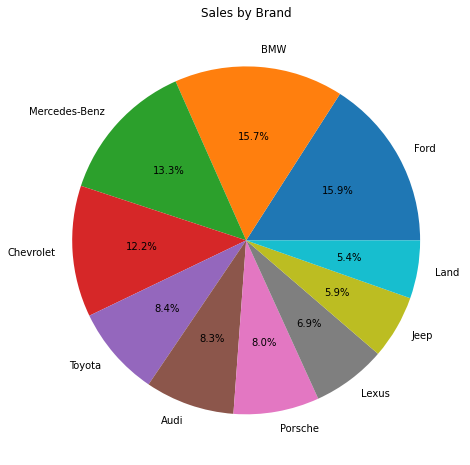

In [27]:
plt.figure(figsize=(12,8))
plt.pie(data=top_sales_by_brand,x="sales",labels="brand",autopct="%1.1f%%",)
plt.title("Sales by Brand")

In [28]:
top_price_by_brand=df.groupby(["brand"])["price"].max().reset_index().head(10)
top_price_by_brand.columns=["brand","price"]
top_price_by_brand.sort_values("price",ascending=False,inplace=True)
top_price_by_brand

,brand,price
6,Bugatti,1950995.0
8,Cadillac,479995.0
5,Bentley,349950.0
2,Aston,279950.0
3,Audi,187900.0
9,Chevrolet,179000.0
4,BMW,145000.0
0,Acura,143900.0
1,Alfa,75900.0
7,Buick,42442.0


Text(0.5, 1.0, 'price by brand')

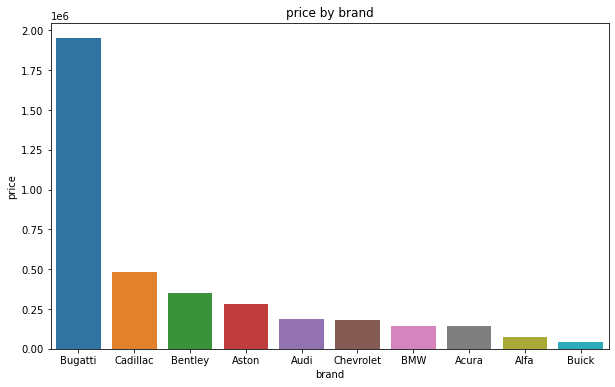

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_price_by_brand , x="brand",y="price")
plt.title("price by brand")

In [30]:
average_price_by_model_year=df.groupby(['model_year'])["price"].mean().reset_index()
average_price_by_model_year.columns=["model year","average price"]
average_price_by_model_year.sort_values("model year",ascending=False,inplace=True)
round(average_price_by_model_year,0).head(25)

,model year,average price
33,2024,91581.0
32,2023,85761.0
31,2022,67797.0
30,2021,64758.0
29,2020,58614.0
28,2019,50302.0
27,2018,50671.0
26,2017,40692.0
25,2016,35867.0
24,2015,30816.0


In [31]:
sales_by_model_year=df["model_year"].value_counts().head(25)
sales_by_model_year

2022    347
2021    335
2018    307
2020    307
2019    292
2016    264
2017    256
2015    224
2023    216
2014    177
2013    151
2012    136
2011    121
2008    110
2010     99
2007     96
2009     71
2005     70
2006     63
2004     58
2003     45
2002     32
2001     32
2000     17
1999     15
Name: model_year, dtype: int64

In [32]:
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,None reported,Yes,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,Yes,34999.0
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,2.4 Liter,F,None reported,Yes,14798.0
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,31000.0
7,BMW,740 iL,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,None reported,Yes,7300.0
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,41927.0
9,Tesla,Model X Long Range Plus,2020,34000.0,Gasoline,534.0HP Electric Motor Electric Fuel System,A/T,None reported,Yes,69950.0


In [33]:
df['fuel_type'] = df['fuel_type'].str.replace("–", "not supported")

In [34]:
df["fuel_type"].value_counts()

Gasoline          3384
Hybrid             190
E85 Flex Fuel      133
Diesel             110
not supported       46
Plug-In Hybrid      33
Name: fuel_type, dtype: int64

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

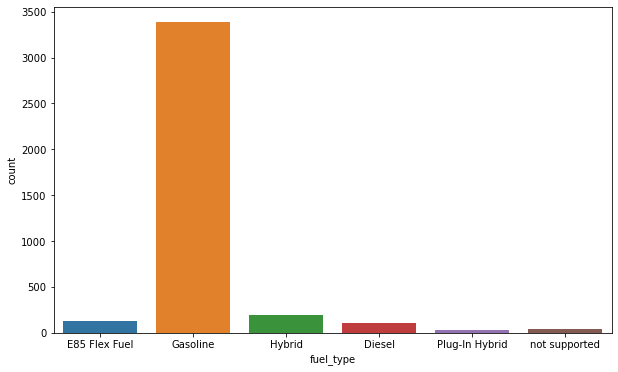

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="fuel_type")

In [36]:
df["engine"]=df["engine"].str.replace("–","2.0L I4 16V GDI DOHC Turbo")

In [37]:
sales_by_engine=df["engine"].value_counts().reset_index().head(10)
sales_by_engine.columns=["engine","sales"]
sales_by_engine

,engine,sales
0,2.0L I4 16V GDI DOHC Turbo,96
1,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,48
2,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,46
3,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,42
4,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,42
5,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,40
6,5.7L V8 16V MPFI OHV,29
7,3.6L V6 24V GDI DOHC,28
8,340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,28
9,268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,24


Text(0.5, 1.0, 'sales by engine')

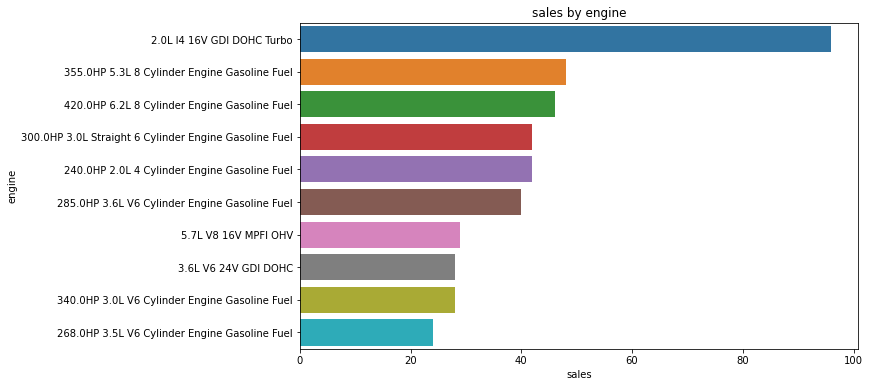

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_engine,x="sales",y="engine")
plt.title("sales by engine")

In [39]:
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,None reported,Yes,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,Yes,34999.0
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,2.4 Liter,F,None reported,Yes,14798.0
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,31000.0
7,BMW,740 iL,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,None reported,Yes,7300.0
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,41927.0
9,Tesla,Model X Long Range Plus,2020,34000.0,Gasoline,534.0HP Electric Motor Electric Fuel System,A/T,None reported,Yes,69950.0


In [40]:
## Car Price Prediction (LR)
lm=LinearRegression()
x=df[["milage"]]
y=df["price"]
lm.fit(x,y)
lm.score(x,y)

0.09156409050732472

In [41]:
## Car Price Prediction (MLR)
obj = df.select_dtypes(include='object')
non_obj=df.select_dtypes(exclude='object')
for i in range (0,obj.shape[1]):
    obj.iloc[ : ,i]=pd.get_dummies(obj.iloc[ : ,i])

C:\Users\AQSAA\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\AQSAA\anaconda3\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [42]:
df=pd.concat([obj,non_obj],axis=1)

In [43]:
df

,brand,model,fuel_type,engine,transmission,accident,clean_title,model_year,milage,price
0,0,0,0,0,0,1,1,2013,51000.0,10300.0
1,0,0,0,0,0,1,1,2021,34742.0,38005.0
2,0,0,0,0,0,0,1,2022,22372.0,54598.0
3,0,0,0,0,0,0,1,2015,88900.0,15500.0
4,0,0,0,0,0,0,1,2021,9835.0,34999.0
...,...,...,...,...,...,...,...,...,...,...
4004,0,0,0,0,0,0,1,2023,714.0,349950.0
4005,0,0,0,0,0,0,1,2022,10900.0,53900.0
4006,0,0,0,0,0,0,1,2022,2116.0,90998.0
4007,0,0,0,0,0,0,1,2020,33000.0,62999.0


In [44]:
df.columns

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'accident',
       'clean_title', 'model_year', 'milage', 'price'],
      dtype='object')

In [45]:
features=df[['brand', 'model', 'fuel_type', 'engine', 'transmission', 'accident',
       'clean_title', 'model_year', 'milage']]
lm.fit(features,y)
lm.score(features,y)

0.09425151717872438